<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/2Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold


In [3]:
import pandas as pd
data2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_2_Group_5_Fold.xlsx')
data2 = data2.iloc[:, 1:]
data2

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,good,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,bad,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,good,1
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,good,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,bad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,good,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,good,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,bad,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,good,2


In [4]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

In [5]:
tables = [data2]
table_names = ['data2']

for table in tables:
    table['NATNL'] = table['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

for table in tables:
    table = table.sort_values(['PatientUID', 'PatientVisitUID'])
    table['TimeDiff'] = table.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
    table['TimeDiff'] = table['TimeDiff'].fillna(0)

for table in tables:
    table['time_t1'] = pd.to_datetime(table['time_t1'])

columns_to_encode = ['VisitLocation', 'Group', 'NATNL']
for table in tables:
    for column in columns_to_encode:
        encoding_map = {category: i for i, category in enumerate(table[column].unique())}
        table[column] = table[column].map(encoding_map)

In [22]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

for table, table_name in zip(tables, table_names):
    X = table.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold'], axis=1)
    y = table['Group']

    all_folds = table['Fold'].unique()

    X_train_scaled_list = []
    y_train_list = []
    X_test_scaled_list = []
    y_test_list = []

    for train_folds, test_fold in kf.split(all_folds):
        train_folds = all_folds[train_folds]
        val_fold = all_folds[test_fold][0]
        train_indices = table['Fold'].isin(train_folds)
        test_indices = table['Fold'] == val_fold
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_train_scaled_list.append(X_train_scaled)
        y_train_list.append(y_train)
        X_test_scaled_list.append(X_test_scaled)
        y_test_list.append(y_test)

    for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
            zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
    ):
        train_folds, test_fold = train_fold_indices
        print(f"Table: {table_name}, Fold {fold + 1}:")
        print(f"Training set size: {X_train_scaled_fold.shape}")
        print(f"Test set size: {X_test_scaled_fold.shape}")
        print(f"Folds in training set: {train_folds.tolist()}")
        print(f"Folds in test set: {test_fold}")
        print("---\n")


Table: data2, Fold 1:
Training set size: (42184, 74)
Test set size: (10436, 74)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Table: data2, Fold 2:
Training set size: (42274, 74)
Test set size: (10346, 74)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Table: data2, Fold 3:
Training set size: (41978, 74)
Test set size: (10642, 74)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Table: data2, Fold 4:
Training set size: (42027, 74)
Test set size: (10593, 74)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Table: data2, Fold 5:
Training set size: (42017, 74)
Test set size: (10603, 74)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---



In [23]:
import json

with open('rf_grid_search_results.json', 'r') as f:
    rf_grid_search_results = json.load(f)
rf_params = max(rf_grid_search_results, key=lambda x: x['best_score'])
rf_best_params = rf_params['best_params']
print(f"RF Parameters: {rf_best_params}")


with open('svc_grid_search_results.json', 'r') as f:
    svc_grid_search_results = json.load(f)
svc_params = max(svc_grid_search_results, key=lambda x: x['best_score'])
svc_best_params = svc_params['best_params']
print(f"SVC Parameters: {svc_best_params}")


with open('xgb_grid_search_results.json', 'r') as f:
    xgb_grid_search_results = json.load(f)
xgb_params = max(xgb_grid_search_results, key=lambda x: x['best_score'])
xgb_best_params = xgb_params['best_params']
print(f"XGB Parameters: {xgb_best_params}")

RF Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
SVC Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
XGB Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [24]:
# Function to generate a report
def generate_report(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })

In [25]:
def plot_roc_curve(model_name, y_true, y_probs, color):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})', color=color)


# RF

In [26]:
# Train and Save the best fold of Random Forest
best_fold_rf = None
best_rf_metrics = None
best_rf_model = None

# Initialize test sets for RF
X_test_scaled_rf = None
y_test_rf = None

for table, table_name in zip(tables, table_names):
    X = table.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold'], axis=1)
    y = table['Group']
    all_folds = table['Fold'].unique()

    for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
        train_folds = all_folds[train_folds]
        val_fold = all_folds[test_fold][0]
        train_indices = table['Fold'].isin(train_folds)
        test_indices = table['Fold'] == val_fold
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train Random Forest model
        rf_classifier = RandomForestClassifier(**rf_best_params)
        rf_classifier.fit(X_train_scaled, y_train)

        # Evaluate on Validation Set
        rf_predictions = rf_classifier.predict(X_test_scaled)
        rf_accuracy = accuracy_score(y_test, rf_predictions)
        rf_precision = precision_score(y_test, rf_predictions)
        rf_recall = recall_score(y_test, rf_predictions)
        rf_f1 = f1_score(y_test, rf_predictions)

        # Track the best fold
        if best_rf_metrics is None or rf_f1 > best_rf_metrics['F1 Score']:
            best_fold_rf = fold
            best_rf_metrics = {
                'Model': 'Random Forest',
                'Fold': fold + 1,
                'Accuracy': rf_accuracy,
                'Precision': rf_precision,
                'Recall': rf_recall,
                'F1 Score': rf_f1
            }
            best_rf_model = rf_classifier

        # Update the best test sets
            X_test_scaled_rf = X_test_scaled
            y_test_rf = y_test

# Save the model from the best fold
if best_rf_model is not None:
    joblib.dump(best_rf_model, 'best_rf_model.joblib')
    print(f"Best Random Forest Model saved successfully from fold {best_fold_rf + 1}")


Best Random Forest Model saved successfully from fold 1


In [27]:
rf_predictions = rf_classifier.predict(X_test_scaled)
rf_report = generate_report("Random Forest", y_test, rf_predictions)

In [28]:
rf_report

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.999812,1.0,0.998824,0.999411


# SVC


In [37]:
# Train SVC model
best_fold_svc = None
best_svc_metrics = None
best_svc_model = None

# Initialize test sets for SVC
X_test_scaled_svc = None
y_test_svc = None

for table, table_name in zip(tables, table_names):
    X = table.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold'], axis=1)
    y = table['Group']
    all_folds = table['Fold'].unique()

    for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
        train_folds = all_folds[train_folds]
        val_fold = all_folds[test_fold][0]
        train_indices = table['Fold'].isin(train_folds)
        test_indices = table['Fold'] == val_fold
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train SVC model
        svc_classifier = SVC(probability=True, **svc_best_params)
        svc_classifier.fit(X_train_scaled, y_train)

        # Evaluate on Validation Set
        svc_predictions = svc_classifier.predict(X_test_scaled)
        svc_accuracy = accuracy_score(y_test, svc_predictions)
        svc_precision = precision_score(y_test, svc_predictions)
        svc_recall = recall_score(y_test, svc_predictions)
        svc_f1 = f1_score(y_test, svc_predictions)

        # Track the best fold
        if best_svc_metrics is None or svc_f1 > best_svc_metrics['F1 Score']:
            best_fold_svc = fold
            best_svc_metrics = {
                'Model': 'SVC',
                'Fold': fold + 1,
                'Accuracy': svc_accuracy,
                'Precision': svc_precision,
                'Recall': svc_recall,
                'F1 Score': svc_f1
            }
            best_svc_model = svc_classifier

        # Update the best test sets
            X_test_scaled_svc = X_test_scaled
            y_test_svc = y_test

# Save the model from the best fold
if best_svc_model is not None:
    joblib.dump(best_svc_model, 'best_svc_model.joblib')
    print(f"Best SVC Model saved successfully from fold {best_fold_svc + 1}")


Best SVC Model saved successfully from fold 3


In [38]:
svc_predictions = svc_classifier.predict(X_test_scaled)
svc_report = generate_report("SVC", y_test, svc_predictions)

In [39]:
svc_report

,Model,Accuracy,Precision,Recall,F1 Score
0,SVC,0.983762,0.963125,0.933939,0.948308


# XGBoost

In [14]:
# Train XGBoost model
best_fold_xgb = None
best_xgb_metrics = None
best_xgb_model = None

# Initialize test sets for XGB
X_test_scaled_xgb = None
y_test_xgb = None

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = table['Fold'].isin(train_folds)
    test_indices = table['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train XGBoost model
    xgb_classifier = XGBClassifier(**xgb_best_params)
    xgb_classifier.fit(X_train_scaled, y_train)

    # Evaluate XGBoost on validation set
    xgb_predictions = xgb_classifier.predict(X_test_scaled)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)
    xgb_precision = precision_score(y_test, xgb_predictions)
    xgb_recall = recall_score(y_test, xgb_predictions)
    xgb_f1 = f1_score(y_test, xgb_predictions)

    # Track the best fold
    if best_xgb_metrics is None or xgb_f1 > best_xgb_metrics['F1 Score']:
        best_fold_xgb = fold
        best_xgb_metrics = {
            'Model': 'XGBoost',
            'Fold': fold + 1,
            'Accuracy': xgb_accuracy,
            'Precision': xgb_precision,
            'Recall': xgb_recall,
            'F1 Score': xgb_f1
        }
        best_xgb_model = xgb_classifier

        # Update the best test sets
        X_test_scaled_xgb = X_test_scaled
        y_test_xgb = y_test

# Save the model from the best fold
if best_xgb_model is not None:
    joblib.dump(best_xgb_model, 'best_xgb_model.joblib')
    print(f"Best XGBoost Model saved successfully from fold {best_fold_xgb + 1}")


Best XGBoost Model saved successfully from fold 4


In [15]:
xgb_predictions = xgb_classifier.predict(X_test_scaled)
xgb_report = generate_report("XGB", y_test, xgb_predictions)

# FNN

In [16]:
import numpy as np

In [17]:
# Train FNN
best_fold = None
best_fold_metrics = None
best_fnn_model = None

# Initialize test sets for FNN
X_test_scaled_fnn = None
y_test_fnn_encoded = None

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = table['Fold'].isin(train_folds)
    test_indices = table['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Encode y_train and y_test
    label_encoder = LabelEncoder()
    y_train_resampled = label_encoder.fit_transform(y_train_resampled)
    y_test_encoded = label_encoder.transform(y_test)

    # One-hot encode labels for FNN
    y_train_one_hot = tf.keras.utils.to_categorical(y_train_resampled, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=2)

    # Build and compile the FNN model
    fnn_model = Sequential([
        Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    fnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the FNN model
    history = fnn_model.fit(X_train_scaled, y_train_one_hot,
                            batch_size=500,
                            epochs=50,
                            verbose=0,
                            validation_data=(X_test_scaled, y_test_one_hot))

    # Evaluate FNN on validation set
    fnn_predictions = np.argmax(fnn_model.predict(X_test_scaled), axis=1)
    fnn_accuracy = accuracy_score(y_test_encoded, fnn_predictions)
    fnn_precision = precision_score(y_test_encoded, fnn_predictions)
    fnn_recall = recall_score(y_test_encoded, fnn_predictions)
    fnn_f1 = f1_score(y_test_encoded, fnn_predictions)

    # Track the best fold
    if best_fold_metrics is None or fnn_f1 > best_fold_metrics['F1 Score']:
        best_fold = fold
        best_fold_metrics = {
            'Model': 'FNN',
            'Fold': fold + 1,
            'Accuracy': fnn_accuracy,
            'Precision': fnn_precision,
            'Recall': fnn_recall,
            'F1 Score': fnn_f1
        }
        best_fnn_model = fnn_model

        # Update the best test sets
        X_test_scaled_fnn = X_test_scaled
        y_test_fnn_encoded = y_test_encoded

# Save the model from the best fold
if best_fnn_model is not None:
    best_fnn_model.save('best_fnn_model.h5')
    print(f"Best FNN Model saved successfully from fold {best_fold + 1}")


333/333 [==============================] - 1s 2ms/step
Best FNN Model saved successfully from fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Convert best FNN metrics to DataFrame
best_fnn_report = pd.DataFrame([best_fold_metrics])

In [46]:
comparison_table = pd.concat([rf_report, svc_report, xgb_report, best_fnn_report], ignore_index=True)
print(comparison_table)

           Model  Accuracy  Precision    Recall  F1 Score  Fold
0  Random Forest  0.999812   1.000000  0.998824  0.999411   NaN
1            SVC  0.983762   0.963125  0.933939  0.948308   NaN
2            XGB  0.998260   1.000000  0.989091  0.994516   NaN
3            FNN  0.994394   0.987745  0.976970  0.982328   3.0


In [47]:
from IPython.display import display
from tabulate import tabulate

# Assuming comparison_table is your concatenated DataFrame
data = comparison_table.to_dict('records')  # Convert DataFrame to a list of dictionaries

# Print the table as text
table_text = tabulate(data, headers="keys", tablefmt="pretty")

# Display the table in Jupyter notebook
display(table_text)


'+---------------+--------------------+--------------------+--------------------+--------------------+------+\n|     Model     |      Accuracy      |     Precision      |       Recall       |      F1 Score      | Fold |\n+---------------+--------------------+--------------------+--------------------+--------------------+------+\n| Random Forest | 0.9998120654012403 |        1.0         | 0.9988235294117647 | 0.9994114184814596 | nan  |\n|      SVC      | 0.9837618403247632 |      0.963125      | 0.933939393939394  | 0.9483076923076924 | nan  |\n|      XGB      | 0.9982601971776532 |        1.0         | 0.9890909090909091 | 0.9945155393053016 | nan  |\n|      FNN      | 0.9943939686835492 | 0.9877450980392157 | 0.9769696969696969 | 0.9823278488726386 | 3.0  |\n+---------------+--------------------+--------------------+--------------------+--------------------+------+'

#ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model_name, y_true, y_probs, label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc = roc_auc_score(y_true, y_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Random Forest
rf_probs = best_rf_model.predict_proba(X_test_scaled_rf)[:, 1]
plot_roc_curve('Random Forest', y_test_rf, rf_probs)

# SVC
svc_probs = best_svc_model.predict_proba(X_test_scaled_svc)[:, 1]
plot_roc_curve('SVC', y_test_svc, svc_probs)

# XGBoost
xgb_probs = best_xgb_model.predict_proba(X_test_scaled_xgb)[:, 1]
plot_roc_curve('XGBoost', y_test_xgb, xgb_probs)

# FNN
fnn_probs = best_fnn_model.predict(X_test_scaled_fnn)[:, 1]
plot_roc_curve('FNN', y_test_fnn_encoded, fnn_probs)


324/324 [==============================] - 1s 3ms/step


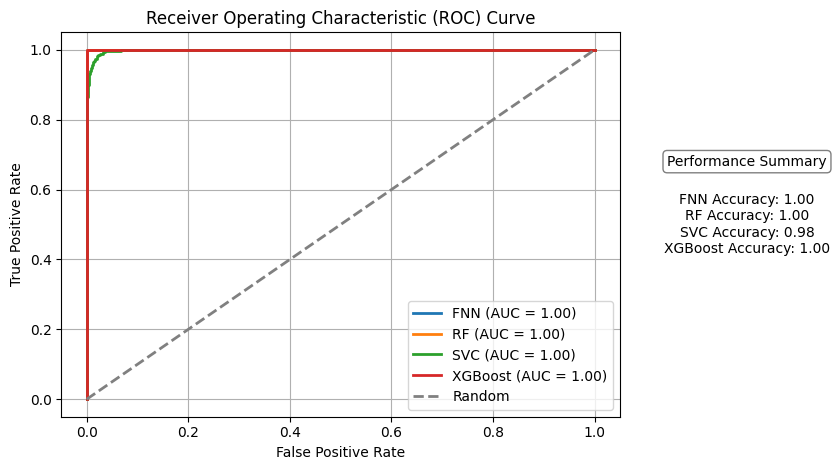

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold


# For FNN model
fnn_probs = fnn_model.predict(X_test_scaled_fnn)[:, 1]
plot_roc_curve('FNN', y_test_fnn_encoded, fnn_probs, '#190000')  # Red color palette

# For Random Forest model
rf_probs = best_rf_model.predict_proba(X_test_scaled_rf)[:, 1]
plot_roc_curve('RF', y_test_rf, rf_probs, '#800000')  # Red color palette

# For SVC model
svc_probs = best_svc_model.predict_proba(X_test_scaled_svc)[:, 1]
plot_roc_curve('SVC', y_test_svc, svc_probs, '#b30000')   # Red color palette

# For XGBoost model
xgb_probs = best_xgb_model.predict_proba(X_test_scaled_xgb)[:, 1]
plot_roc_curve('XGBoost', y_test_xgb, xgb_probs, '#ff0000')  # Red color palette

# Plotting settings
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Adding consolidated box for all performance summaries
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5)
plt.text(1.3, 0.68, 'Performance Summary', horizontalalignment='center', verticalalignment='center', bbox=bbox_props)
plt.text(1.3, 0.5, f'FNN Accuracy: {accuracy_score(y_test_fnn_encoded, np.round(fnn_probs)):.2f}\n'
                  f'RF Accuracy: {accuracy_score(y_test_rf, np.round(rf_probs)):.2f}\n'
                  f'SVC Accuracy: {accuracy_score(y_test_svc, np.round(svc_probs)):.2f}\n'
                  f'XGBoost Accuracy: {accuracy_score(y_test_xgb, np.round(xgb_probs)):.2f}',
                  horizontalalignment='center', verticalalignment='center', color='black')

plt.show()
